# Exploratory Data Analysis for Airplane Arrival Times In New York (JFK Airport)

## Purpose: Explore various fields within the dataset, to understand basic characteristics of airline delays

In [1]:
#neccessary libraries for EDA
#pandas for cleaning, seaborn for plotting + matplotlib
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt 

In [2]:
df = pd.read_csv("ON_TIME_2.csv")

In [3]:
#cancelled flights at jfk, frequency
#0 equivalent to no cancellation, 1 is a cancellation
filter1 = df['ORIGIN'] == "JFK"
jfk_all = df.where(filter1)

jfk_all['CANCELLED'].value_counts(normalize=True)

0.0    0.995653
1.0    0.004347
Name: CANCELLED, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CANCELLED', ylabel='count'>

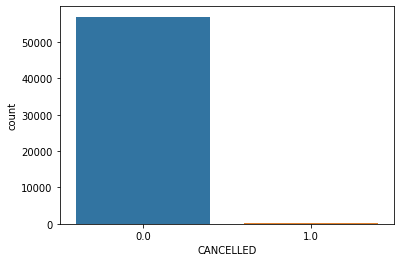

In [4]:
#cancelled flights frequency chart
sns.countplot(df['CANCELLED'])

In [5]:
#sorting by jfk airport where delay is greater 0.0
filter1 = df['ORIGIN'] == "JFK"
filter2 = df['DEP_DELAY'] > 0.0

def create_scatter(x, y, df):
    sns.scatterplot(x = df[f'{x}'], y = df[f'{y}'])

In [6]:
df = df.where(filter1 & filter2, inplace=False)

In [7]:
df['ORIGIN'].value_counts()

JFK    3168
Name: ORIGIN, dtype: int64

In [8]:
df['DEP_DELAY'].value_counts()

1.0      210
2.0      162
3.0      162
4.0      127
5.0      126
        ... 
208.0      1
182.0      1
159.0      1
291.0      1
117.0      1
Name: DEP_DELAY, Length: 224, dtype: int64

## These next few cells test for the underlying distribution of delay times within the dataset

<AxesSubplot:xlabel='ARR_DELAY', ylabel='Count'>

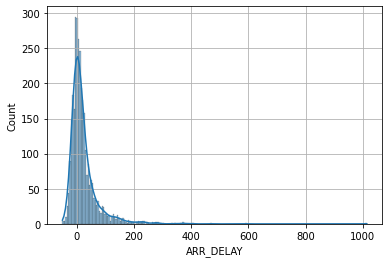

In [9]:
plt.grid()
sns.histplot(data=df, x = "ARR_DELAY", kde=True)

<AxesSubplot:xlabel='CARRIER_DELAY', ylabel='Count'>

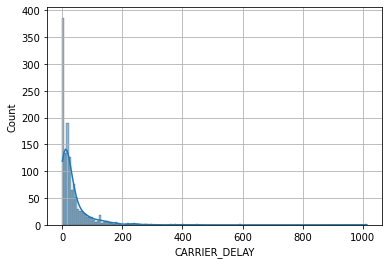

In [10]:
plt.grid()
sns.histplot(data=df, x="CARRIER_DELAY", kde=True)

<AxesSubplot:xlabel='WEATHER_DELAY', ylabel='Count'>

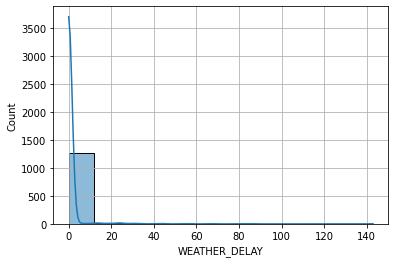

In [11]:
plt.grid()
sns.histplot(data=df, x="WEATHER_DELAY", kde=True)

<AxesSubplot:xlabel='LATE_AIRCRAFT_DELAY', ylabel='Count'>

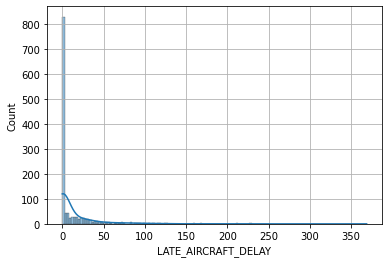

In [12]:
plt.grid()
sns.histplot(data=df, x="LATE_AIRCRAFT_DELAY", kde=True)

<AxesSubplot:xlabel='SECURITY_DELAY', ylabel='Count'>

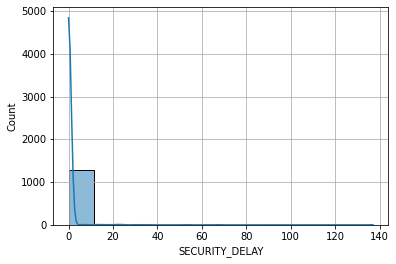

In [13]:
#histogram showing the
plt.grid()
sns.histplot(data=df, x="SECURITY_DELAY", kde=True)

Text(0.5, 1.0, 'NAS_DELAY')

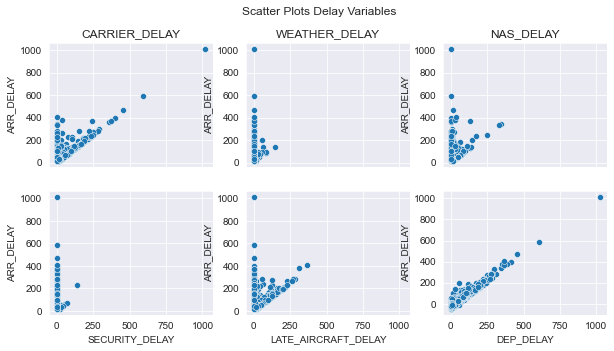

In [47]:
#Aggregated Probability Distrbutions
figure, axes = plt.subplots(2, 3, sharex=True, figsize=(10,5))
figure.suptitle('Scatter Plots Delay Variables')
sns.set_style("darkgrid")
sns.scatterplot(ax=axes[0, 0], data=df, x='CARRIER_DELAY', y='ARR_DELAY')
sns.scatterplot(ax=axes[0, 1], data=df, x='WEATHER_DELAY', y='ARR_DELAY')
sns.scatterplot(ax=axes[0, 2], data=df, x='NAS_DELAY', y='ARR_DELAY')
sns.scatterplot(ax=axes[1, 0], data=df, x='SECURITY_DELAY', y='ARR_DELAY')
sns.scatterplot(ax=axes[1, 1], data=df, x='LATE_AIRCRAFT_DELAY', y='ARR_DELAY')
sns.scatterplot(ax=axes[1, 2], data=df, x='DEP_DELAY', y='ARR_DELAY')
axes[0, 0].set_title('CARRIER_DELAY')
axes[0, 1].set_title('WEATHER_DELAY')
axes[0, 2].set_title('NAS_DELAY')

## After learning about the realtively skewed nature of the delay data, we can begin making simple scatter plots to understand the realtionship between arrival delays and various continous variables.

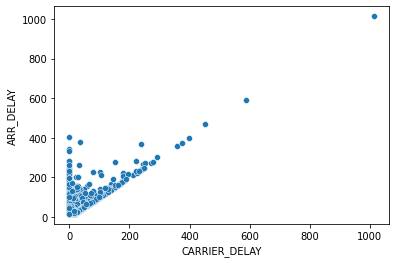

In [14]:
#Scatter plot between carrier delay and departure delay
create_scatter("CARRIER_DELAY", "ARR_DELAY", df)

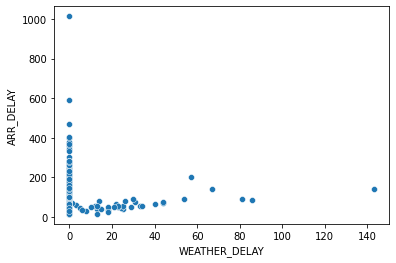

In [15]:
create_scatter("WEATHER_DELAY", "ARR_DELAY", df)

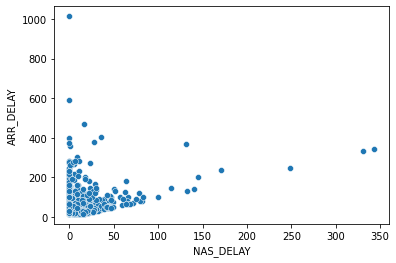

In [16]:
create_scatter("NAS_DELAY", "ARR_DELAY", df)

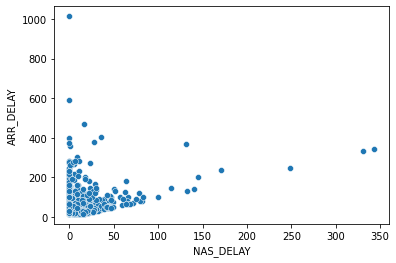

In [17]:
create_scatter("NAS_DELAY", "ARR_DELAY", df)

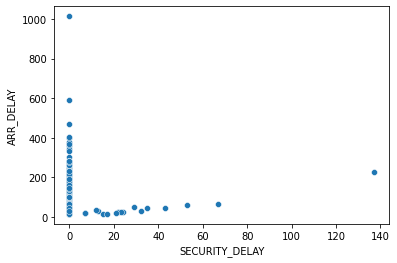

In [18]:
create_scatter("SECURITY_DELAY", "ARR_DELAY", df)

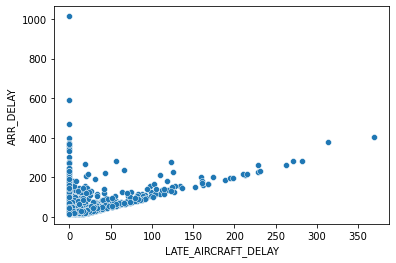

In [19]:
create_scatter("LATE_AIRCRAFT_DELAY", "ARR_DELAY", df)

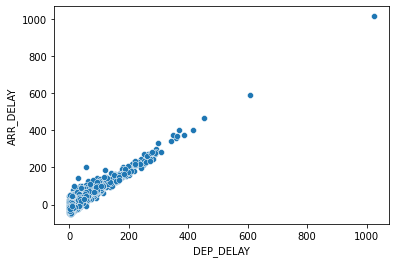

In [20]:
create_scatter("DEP_DELAY", "ARR_DELAY", df)

Text(0.5, 1.0, 'NAS_DELAY')

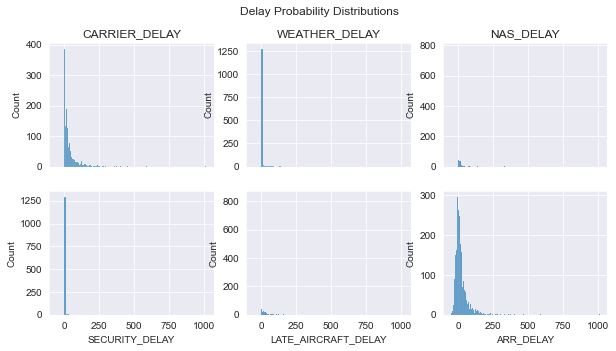

In [46]:
#this block of code creates a large summation of the plots created above
figure, axes = plt.subplots(2, 3, sharex=True, figsize=(10,5))
figure.suptitle('Delay Probability Distributions')
sns.set_style("darkgrid")
sns.histplot(ax=axes[0, 0], data=df, x='CARRIER_DELAY')
sns.histplot(ax=axes[0, 1], data=df, x='WEATHER_DELAY')
sns.histplot(ax=axes[0, 2], data=df, x='NAS_DELAY')
sns.histplot(ax=axes[1, 0], data=df, x='SECURITY_DELAY')
sns.histplot(ax=axes[1, 1], data=df, x='LATE_AIRCRAFT_DELAY')
sns.histplot(ax=axes[1, 2], data=df, x='ARR_DELAY')
axes[0, 0].set_title('CARRIER_DELAY')
axes[0, 1].set_title('WEATHER_DELAY')
axes[0, 2].set_title('NAS_DELAY')

## Finally we create boxplots of our explanatory variables to understand how prevalent outliers are

Text(0.5, 0, 'Delay Time in Minutes')

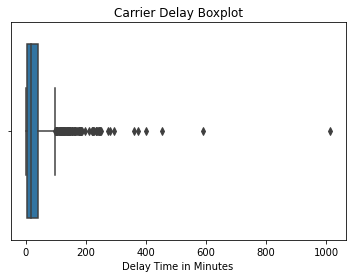

In [22]:
cd = sns.boxplot(x=df['CARRIER_DELAY'])
cd.set_title('Carrier Delay Boxplot')
cd.set_xlabel('Delay Time in Minutes')

Text(0.5, 0, 'Delay Time in Minutes')

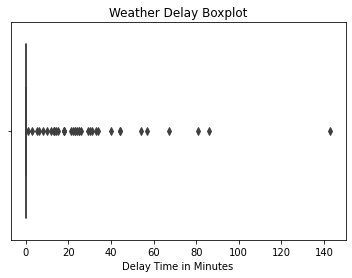

In [23]:
wd = sns.boxplot(x=df['WEATHER_DELAY'])
wd.set_title('Weather Delay Boxplot')
wd.set_xlabel('Delay Time in Minutes')

Text(0.5, 0, 'Delay Time In Minutes')

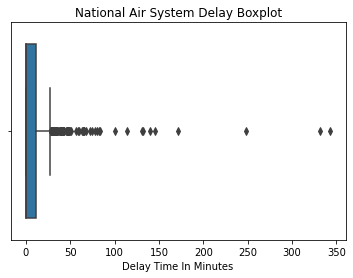

In [24]:
ns = sns.boxplot(x=df['NAS_DELAY'])
ns.set_title('National Air System Delay Boxplot')
ns.set_xlabel('Delay Time In Minutes')

Text(0.5, 0, 'Delay Time In Minutes')

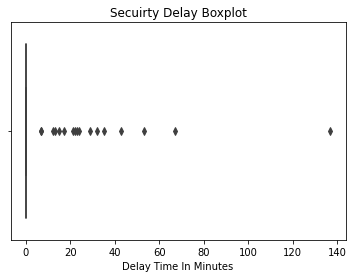

In [25]:
sd = sns.boxplot(x=df['SECURITY_DELAY'])
sd.set_title('Secuirty Delay Boxplot')
sd.set_xlabel('Delay Time In Minutes')

Text(0.5, 0, 'Delay Time In Minutes')

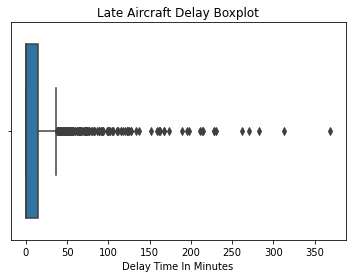

In [26]:
la = sns.boxplot(x=df['LATE_AIRCRAFT_DELAY'])
la.set_title('Late Aircraft Delay Boxplot')
la.set_xlabel('Delay Time In Minutes')

Text(0.5, 0, 'Delay Time In Minutes')

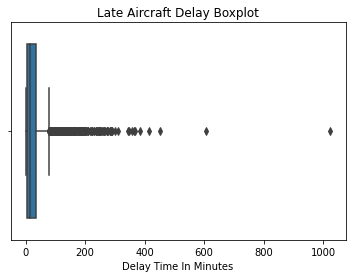

In [27]:
la = sns.boxplot(x=df['DEP_DELAY'])
la.set_title('Late Aircraft Delay Boxplot')
la.set_xlabel('Delay Time In Minutes')

<AxesSubplot:xlabel='ARR_DELAY'>

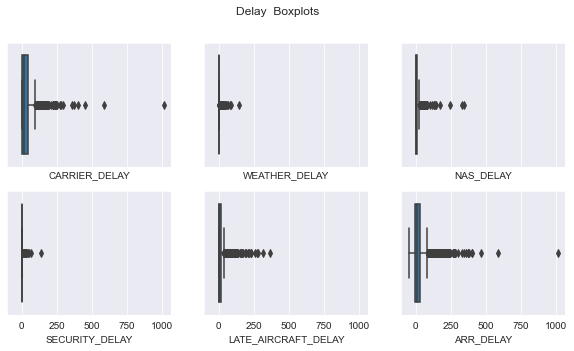

In [45]:
sns.set_style("darkgrid")
figure, axes = plt.subplots(2, 3, sharex=True, figsize=(10,5))
figure.suptitle('Delay  Boxplots')
sns.boxplot(ax=axes[0, 0], data=df, x='CARRIER_DELAY')
sns.boxplot(ax=axes[0, 1], data=df, x='WEATHER_DELAY')
sns.boxplot(ax=axes[0, 2], data=df, x='NAS_DELAY')
sns.boxplot(ax=axes[1, 0], data=df, x='SECURITY_DELAY')
sns.boxplot(ax=axes[1, 1], data=df, x='LATE_AIRCRAFT_DELAY')
sns.boxplot(ax=axes[1, 2], data=df, x='ARR_DELAY')